<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/3.%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021년 1월 6일 지코바 먹고 다시 봐보자

출처 : https://wikidocs.net/57810

참고 :  https://github.com/Namsik-Yoon/pytorch_basic/blob/master/3.%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80(logistic_Regression).ipynb 

# 3. 로지스틱 회귀(Logistic Regression)

## 3.1 로지스틱 회귀(Logistic Regression)

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 

예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 

이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 합니다. 

그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다.

* 로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류(Classification) 작업에 사용할 수 있습니다.



### 3.1.1 이진 분류(Binary Classification)

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해봅시다. 

시험 성적이 $x$라면, 합불 결과는 $y$입니다. 

이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

|score$(x)$|result$(y)$|
|:----|:----|
|45|불합격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

위의 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같습니다.

![대체 텍스트](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다. 

이러한 $x$와 $y$의 관계를 표현하기 위해서는 $Wx+b$와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요합니다. 

이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않습니다.

그래서 이번 로지스틱 회귀의 가설은 선형 회귀 때의 $H(x)=Wx+b$가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 $f$를 추가적으로 사용하여 $H(x)=f(Wx+b)$의 가설을 사용할 겁니다. 

그리고 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 $f$가 이미 널리 알려져있습니다. 

바로 시그모이드 함수입니다.




### 3.1.2 시그모이드 함수(Sigmoid function)


위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같다.

$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$

선형 회귀의 목표는 최적의 $W$와 $b$를 찾는 것이었다.

$W$는 직선의 기울기를, $b$는 y절편을 의미했다.

여기에서는 어떤 영향을 주는지 알아보자

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

1) W가 1이고 b가 0인 그래프

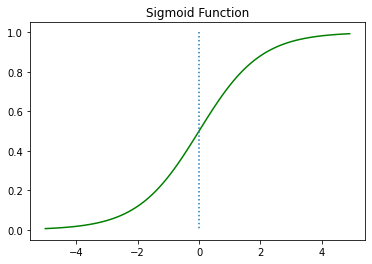

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프를 통해 시그모이드 함수는 출력값을 0과 1사이의 값으로 저장하여 반환함을 알 수 있다.

$x$가 0일 때 0.5의 값을, 매우 작을 때 0에 수렴, 매우 클 때 1에 수렴한다.

2) W값의 변화에 따른 경사도의 변화

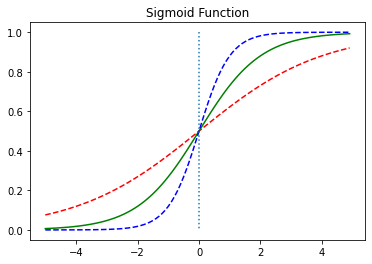

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5
plt.plot(x, y2, 'g') # W의 값이 1
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프에서 $W$ 값이 0.5일 때 빨간색, 1일 때 초록색, 2일 때 파란색이 나오도록 하였다.

$W$ 갑에 따라 그래프의 경사도가 변하는 것을 볼 수 있다.

선형 회귀에서의 가중치 $W$ 는 직선의 기울기, 여기서는 그래프의 경사도 라는 것을 기억하자.

3) b값의 변화에 따른 좌, 우 이동

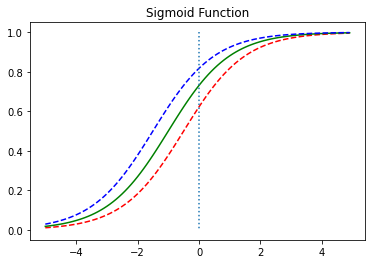

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 $b$ 값에 따라서 그래프가 좌, 우로 이동하는 것을 보여준다.

4) 시그모이드 함수를 이용한 분류

시그모이드 함수의 출력값이 0과 1사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용할 수 있다.

임계값을 0.5라고 정하고 출력값이 0.5이상이면 1(True), 0.5이하면 0(False)로 판단할 수 있다.

이를 확률로 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 50%보다 낮으면 아니라고 판단하는 것으로도 볼 수 있다.

### 3.1.3 비용 함수(Cost function)

이제 로지스틱 회귀의 가설이 $H(x)=sigmoid(Wx+b)$ 인 것은 알았다.

최적의 $W$ 와 $b$ 를 찾을 수 있는 비용 함수(Cost fuction)을 정의하자.

앞서 선형 회귀에서 배운 MSE를 사용하면 어떻게 될까?

$cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$

위의 비용 함수 수식에서 가설은 이제 $H(x)=Wx+b$가 아니라 $H(x)=sigmoid(Wx+b)$ 이다.

그리고 이 비용 함수를 미분하면 선형 회귀 때와 달리 비볼록(non-convex) 형태의 그래프가 나온다.

![대체 텍스트](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG)

위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 점이다.

사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있다. 하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 더 내려가야 한다.

모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 한다. 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 $W$가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않는다.

이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 한다. 이는 cost가 최소가 되는 가중치 $W$를 찾는다는 비용 함수의 목적에 맞지 않는다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점이다. 즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 한다. 그리고 이를 충족하는 함수가 바로 로그 함수이다. 다음은 $y=0.5$에 대칭하는 두 개의 로그 함수 그래프다.

![대체 텍스트](https://wikidocs.net/images/page/57805/%EA%B7%B8%EB%9E%98%ED%94%84.PNG)

실제값이 1일 때의 그래프를 주황색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 초록색 선으로 표현하였다. 실제값이 1이라고 해보면. 이 경우, 예측값인 $H(x)$의 값이 1이면 오차가 0이므로 당연히 cost는 0이 된다. 반면, $H(x)$가 0으로 수렴하면 cost는 무한대로 발산한다. 실제값이 0인 경우는 그 반대로 이해하면 된다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같다.

$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$

$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$

$y$의 실제값이 1일 때 $−logH(x)$ 그래프를 사용하고 $y$의 실제값이 0일 때 $−log(1−H(X))$ 그래프를 사용해야 한다.
이는 다음과 같이 하나의 식으로 통합할 수 있다.

$\text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$

왜 위 식이 두 개의 식을 통합한 식이라고 볼 수 있을까? 실제값 $y$가 1이라고하면 덧셈 기호를 기준으로 우측의 항이 없어진다. 반대로 실제값 $y$가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어진다. 선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했었다. 마찬가지로 여기에서도 모든 오차의 평균을 구한다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

정리하면, 위 비용 함수는 실제값 $y$와 예측값 $H(x)$의 차이가 커지면 cost가 커지고, 실제값 $y$와 예측값 $H(x)$의 차이가 작아지면 cost는 작아진다. 이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 $W$를 찾아간다.

$W := W - α\frac{∂}{∂W}cost(W)$

### 3.1.4 파이토치로 로지스틱 회귀 구현하기

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [7]:
x_data = [[1,2], 
          [2,3], 
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [8]:
print(x_train.shape, y_train.shape)

torch.Size([6, 2]) torch.Size([6, 1])


x_train을 $X$라고 하고, 이와 곱해지는 가중치 벡터를 $W$라고 하면, $XW$가 성립되기 위해서는 $W$ 벡터의 크기는 2x1이어야 한다.

In [9]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

이제 가설식을 세워보겠다. 

파이토치에서는 $e^{x}$를 구현하기 위해서 torch.exp(x)를 사용한다.

이에 따라 행렬 연산을 사용한 가설식은 다음과 같습니다.

In [10]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [12]:
print(hypothesis) # 예측값인 H(x) 출력. 지금은 W,b 모두 초기화 된 상태이다.

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


사실 파이토치에서는 시그모이드 함수를 이미 구현하여 제공한다.

In [13]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [14]:
print(hypothesis) # 예측값인 H(x) 출력 지금은 W,b 모두 초기화 된 상태이다.

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


이제 아래의 비용 함수값. 즉, 현재 예측값과 실제값 사이의 cost를 구해보겠다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

우선, 현재 예측값과 실제값을 출력해보겠다.

In [15]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [16]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0])) # 첫 번째 원소에 대해서만 오차를 구해보자

tensor([0.6931], grad_fn=<NegBackward>)

In [17]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis)) # 모든 원소에 대해 구해보자
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [18]:
cost = losses.mean() # 오차에 대한 평균을 구하자
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


사실 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현하여 제공한다.

In [19]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

이제 전체 코드를 써보자

In [20]:
x_data = [[1,2], 
          [2,3], 
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # Cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print(f'Epoch : {epoch}/{nb_epochs}, Cost : {cost.item()}')

Epoch : 0/1000, Cost : 0.6931471824645996
Epoch : 100/1000, Cost : 0.134722039103508
Epoch : 200/1000, Cost : 0.08064313977956772
Epoch : 300/1000, Cost : 0.05790000036358833
Epoch : 400/1000, Cost : 0.045299697667360306
Epoch : 500/1000, Cost : 0.03726094961166382
Epoch : 600/1000, Cost : 0.03167248144745827
Epoch : 700/1000, Cost : 0.027555905282497406
Epoch : 800/1000, Cost : 0.024394338950514793
Epoch : 900/1000, Cost : 0.02188830077648163
Epoch : 1000/1000, Cost : 0.019852152094244957


In [21]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [22]:
prediction = hypothesis >= torch.FloatTensor([0.5]) # 0.5를 넘으면 True, 넘지 않으면 False
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [23]:
print(W, b) # 훈련이 된 W와 b

tensor([[3.2530],
        [1.5179]], requires_grad=True) tensor([-14.4819], requires_grad=True)


## 3.2 nn.Module로 구현하는 로지스틱 회귀

선형 회귀 모델의 가설식은 $H(x) = Wx + b$

구현하기 위해 파이토치의 nn.Linear()를 사용했다.

로지스틱 회귀의 가설식은 $H(x) = sigmoid(Wx + b)$

구현하기 위해 nn.Linear()의 결과를 nn.Sigmoid()를 거치게 하면 된다.

###3.2.1 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

In [24]:
x_data = [[1,2], 
          [2,3], 
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 한다.

뒤에서 이를 이용해서 인공 신경망을 구현하므로 기억하자.

In [25]:
model = nn.Sequential(
    nn.Linear(2,1), # input_dim = 2, output_dim = 1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다.
)

In [26]:
model(x_train) # 현재 W와 b는 랜덤 초기화가 된 상태이다. 지금 출력되는 값은 아무 의미가 없다.

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [27]:
# 경사 하강법을 사용하여 훈련해보자
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(x_train)

  # Cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print(f'Epoch : {epoch}/{nb_epochs}, Cost : {cost.item()}, Accuracy : {accuracy * 100}%')

Epoch : 0/1000, Cost : 0.5397130846977234, Accuracy : 83.33333333333334%
Epoch : 100/1000, Cost : 0.1342717856168747, Accuracy : 100.0%
Epoch : 200/1000, Cost : 0.08048570901155472, Accuracy : 100.0%
Epoch : 300/1000, Cost : 0.05782029405236244, Accuracy : 100.0%
Epoch : 400/1000, Cost : 0.045251354575157166, Accuracy : 100.0%
Epoch : 500/1000, Cost : 0.037228479981422424, Accuracy : 100.0%
Epoch : 600/1000, Cost : 0.0316491425037384, Accuracy : 100.0%
Epoch : 700/1000, Cost : 0.027538282796740532, Accuracy : 100.0%
Epoch : 800/1000, Cost : 0.024380534887313843, Accuracy : 100.0%
Epoch : 900/1000, Cost : 0.021877193823456764, Accuracy : 100.0%
Epoch : 1000/1000, Cost : 0.019843030720949173, Accuracy : 100.0%


In [28]:
print(list(model.parameters())) # 훈련 후 W와 b의 값을 출력해보자

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


###3.2.2 인공 신경망으로 표현되는 로지스틱 회귀

사실 로지스틱 회귀는 인공 신경망으로 간주할 수 있다.

![대체 텍스트](https://wikidocs.net/images/page/58686/logistic_regression.PNG)

위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 가중치 또는 편향이다. 

각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향이 곱해진다. 각 입력 $x$는 각 입력의 가중치 $w$와 곱해지고, 편향 $b$는 상수 1과 곱해지는 것으로 표현되었다. 그리고 출력하기 전에 시그모이드 함수를 지나게 된다.

결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고 있다.

$H(x)=sigmoid(x_{1}w_{1} + x_{2}w_{2} + b)$

뒤에서 인공 신경망을 배우면서 언급하겠지만, 시그모이드 함수는 인공 신경망의 은닉층에서는 거의 사용되지 않는다.

근데 왜 배움? ㅎ...

그냥 배우라면 배우자 영진아

로지스틱 회귀와 소프트맥스 회귀 : https://hyeonnii.tistory.com/239 참고하시라우


##3.3 클래스로 파이토치 모델 구현하기

### 3.3.1 모델을 클래스로 구현하기

In [29]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [31]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있다.

클래스(class) 형태의 모델은 nn.Module 을 상속받는다. 그리고 __init__()에서 모델의 구조와 동적을 정의하는 생성자를 정의한다. 

이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출된다. 

super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 된다. 

foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수다. 

이 forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행된다. 

예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행된다.

$H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 한다.


### 3.3.2 로지스틱 회귀 클래스로 구현하기

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037228 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031649 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027538 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024381 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021877 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019843 Accuracy 100.00%


#3.4 활용

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/3_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_with_My_data.ipynb

 sklearn에서 제공하는 유방암 데이터를 바탕으로 로지스틱 회귀 모델을 학습한다.

In [33]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [34]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [35]:
cancer_df = pd.DataFrame(data=breast_cancer['data'],columns=breast_cancer['feature_names'])
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
data = cancer_df
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)
data['target'] = breast_cancer['target']
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,2.377491,2.601897,1.085429,0.191637,0.665416,2.065360,-1.137415,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,0
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,1.155840,1.290429,-0.423637,-0.069697,0.251980,0.807720,-0.188995,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,0
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,0.276450,0.180539,-0.379008,0.660696,0.510377,0.611619,-0.890632,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,0
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,1.437265,1.008615,-0.172848,2.015943,1.301140,0.785031,0.326346,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,0


In [37]:
X,y = data.values[:,:-1],data.values[:,-1:]
print(X.shape,y.shape)

(569, 30) (569, 1)


In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [39]:
class MyDataset(Dataset):
    def __init__(self):
        self.x_data = torch.tensor(X,dtype=torch.float)
        self.y_data = torch.tensor(y,dtype=torch.float)
    
    def __len__(self):
        return len(self.x_data)

    def __getitem__(self,idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x,y

In [40]:
dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

In [41]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [42]:
model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [43]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  for x_train, y_train in dataloader:
    # H(x) 계산
    hypothesis = model(x_train)

    # Cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print(f'Epoch : {epoch}/{nb_epochs}, Cost : {cost.item()}, Accuracy : {accuracy * 100}%')

Epoch : 0/1000, Cost : 0.8903037309646606, Accuracy : 25.65905096660808%
Epoch : 100/1000, Cost : 0.1307920664548874, Accuracy : 97.01230228471002%
Epoch : 200/1000, Cost : 0.10329664498567581, Accuracy : 97.71528998242532%
Epoch : 300/1000, Cost : 0.09161856770515442, Accuracy : 98.24253075571178%
Epoch : 400/1000, Cost : 0.08478771150112152, Accuracy : 98.41827768014059%
Epoch : 500/1000, Cost : 0.0801730677485466, Accuracy : 98.59402460456941%
Epoch : 600/1000, Cost : 0.0767846629023552, Accuracy : 98.59402460456941%
Epoch : 700/1000, Cost : 0.07415701448917389, Accuracy : 98.59402460456941%
Epoch : 800/1000, Cost : 0.07203932106494904, Accuracy : 98.59402460456941%
Epoch : 900/1000, Cost : 0.07028315216302872, Accuracy : 98.59402460456941%
Epoch : 1000/1000, Cost : 0.06879442185163498, Accuracy : 98.59402460456941%
